In [2]:
import squidpy as sq
import scanpy as sc
import scipy as scp
import numpy as np 
import pandas as pd
import scvi
import seaborn as sns
import pyensembl as ensb
import matplotlib as plt
import mygene

In [16]:
# sclcCells = sc.read_h5ad('hlca/sclcSinglets.h5ad')
# normalCells = sc.read_h5ad('hlca/normalCells.h5ad')
# sclcCells

In [7]:
sclcCells.var_names = [genefEnsemblID(sclcCells, id) for id in sclcCells.var_names]

In [12]:
sclcCells.write_h5ad('sclcSingletwGenes.h5ad')

In [17]:
sclcCells = sc.read_h5ad('hlca/sclcSingletwGenes.h5ad')
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length
A1BG,False,A1BG,A1BG,NCBITaxon:9606,gene,3999
A1BG-AS1,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374
A1CF,False,A1CF,A1CF,NCBITaxon:9606,gene,9603
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318
A2M-AS1,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948
...,...,...,...,...,...,...
RAB1B,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950
STC1,False,STC1,STC1,NCBITaxon:9606,gene,4134
STXBP1,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358
TEC,False,TEC,TEC,NCBITaxon:9606,gene,4004


In [3]:
# normalCells.var['mitochondrial'] = normalCells.var.feature_name.str.startswith('MT-')
# ribosomalGeneSet = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt" # filter out ribosomal genes too
# df_ribo = pd.read_table(ribosomalGeneSet, skiprows=2, header = None)
# normalCells.var[normalCells.var.feature_name.isin(df_ribo[0].values)] # # two ribosomal genes
# normalCells.var['ribosomal'] = normalCells.var.feature_name.isin(df_ribo[0].values) # bool for ribosomal genes
# sc.pp.calculate_qc_metrics(normalCells, qc_vars=['mitochondrial', 'ribosomal'], percent_top=None, log1p=False, inplace=True)
# normalCells

In [4]:
# sc.pp.filter_genes(normalCells, min_cells=3)
# sc.pp.filter_cells(normalCells, min_genes=200)
# normalCells

In [5]:
# sc.pl.violin(sclcCells, ['n_genes_by_counts', 'total_counts', 'pct_counts_mitochondrial', 'pct_counts_ribosomal'], jitter=0.4, multi_panel=True)

In [18]:
sclcCells.var['mitochondrial'] = sclcCells.var.feature_name.str.startswith('MT-')

In [19]:
ribosomalGeneSet = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt" # filter out ribosomal genes too
df_ribo = pd.read_table(ribosomalGeneSet, skiprows=2, header = None)
sclcCells.var[sclcCells.var.feature_name.isin(df_ribo[0].values)] # # two ribosomal genes
sclcCells.var['ribosomal'] = sclcCells.var.feature_name.isin(df_ribo[0].values) # bool for ribosomal genes

In [20]:
# Calculating QC metrics
sc.pp.calculate_qc_metrics(sclcCells, qc_vars=['mitochondrial', 'ribosomal'], percent_top=None, log1p=False, inplace=True)
sclcCells

AnnData object with n_obs × n_vars = 20561 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [21]:
sclcCells.obs.n_genes_by_counts.min()

186

In [22]:
sc.pp.filter_genes(sclcCells, min_cells=3)
sc.pp.filter_cells(sclcCells, min_genes=200)
sclcCells

AnnData object with n_obs × n_vars = 20507 × 21184
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [23]:
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length,mitochondrial,ribosomal,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
A1BG,False,A1BG,A1BG,NCBITaxon:9606,gene,3999,False,False,3347,0.156388,83.721609,3215.494629,3347
A1BG-AS1,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374,False,False,417,0.017344,97.971889,356.607117,417
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318,False,False,2695,0.181340,86.892661,3728.530029,2695
A2M-AS1,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948,False,False,149,0.007434,99.275327,152.845627,149
A2ML1,False,A2ML1,A2ML1,NCBITaxon:9606,gene,7156,False,False,25,0.001475,99.878411,30.327440,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAB1B,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950,False,False,3156,0.134623,84.650552,2767.977051,3156
STC1,False,STC1,STC1,NCBITaxon:9606,gene,4134,False,False,129,0.007897,99.372599,162.361725,129
STXBP1,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358,False,False,376,0.013774,98.171295,283.200073,376
TEC,False,TEC,TEC,NCBITaxon:9606,gene,4004,False,False,271,0.010885,98.681971,223.807938,271


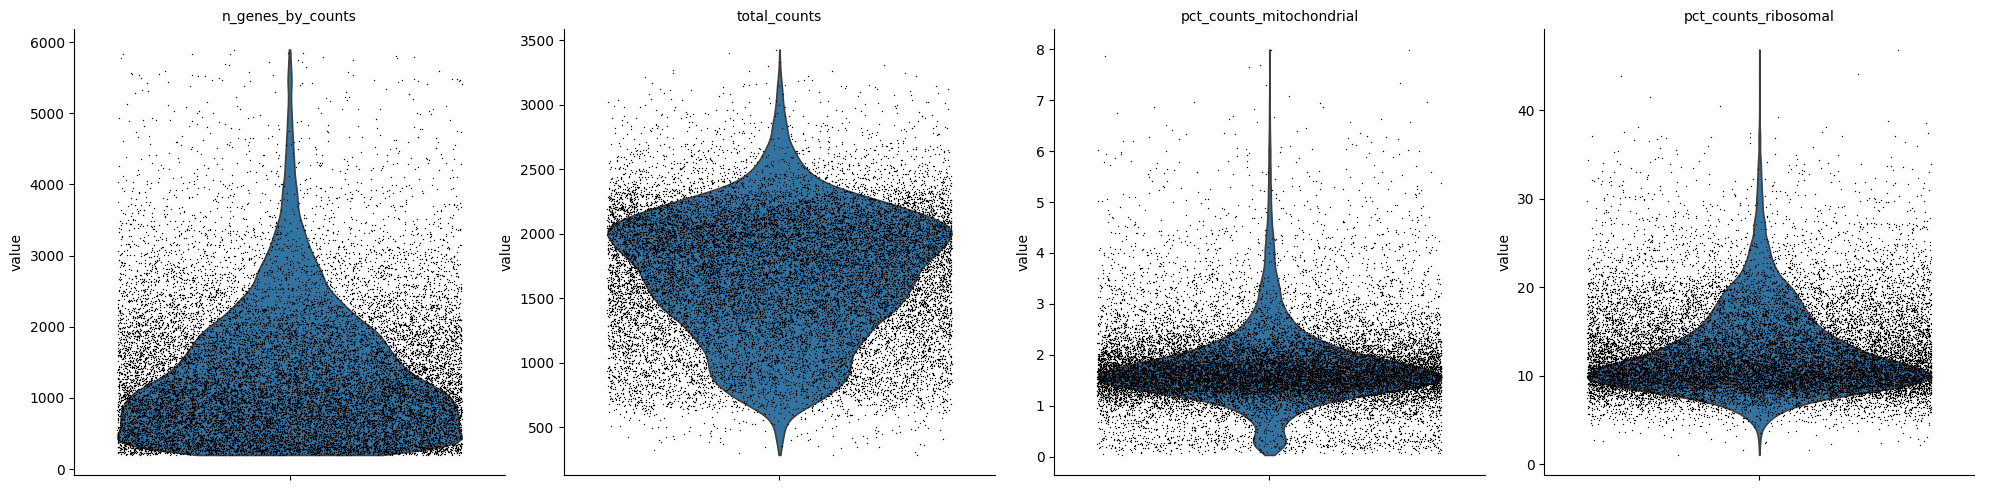

In [24]:
sc.pl.violin(sclcCells, ['n_genes_by_counts', 'total_counts', 'pct_counts_mitochondrial', 'pct_counts_ribosomal'], jitter=0.4, multi_panel=True)

In [25]:
upper_lim = np.quantile(sclcCells.obs.n_genes_by_counts.values, .98)
upper_lim
sclcCells = sclcCells[sclcCells.obs.n_genes_by_counts < upper_lim]
sclcCells = sclcCells[sclcCells.obs.pct_counts_mitochondrial < 20] # less than 20%
sclcCells = sclcCells[sclcCells.obs.pct_counts_ribosomal < 10] # less than 10%

In [26]:
sclcCells

View of AnnData object with n_obs × n_vars = 6114 × 21184
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmoniz

In [27]:
# Normalisation
sc.pp.normalize_total(sclcCells, target_sum=1e4) #normalize every cell to 10,000 UMI
sc.pp.log1p(sclcCells) #change to log counts
sclcCells.X.sum(axis = 1)
sclcCells.raw = sclcCells

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [28]:
sc.pp.highly_variable_genes(sclcCells, n_top_genes = 2000)

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [29]:
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length,mitochondrial,ribosomal,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
A1BG,False,A1BG,A1BG,NCBITaxon:9606,gene,3999,False,False,3347,0.156388,83.721609,3215.494629,3347,False,0.512241,1.531479,-1.233271
A1BG-AS1,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374,False,False,417,0.017344,97.971889,356.607117,417,False,0.101821,1.920774,0.221848
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318,False,False,2695,0.181340,86.892661,3728.530029,2695,True,1.128693,2.657093,2.962579
A2M-AS1,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948,False,False,149,0.007434,99.275327,152.845627,149,False,0.021716,2.341908,0.913430
A2ML1,False,A2ML1,A2ML1,NCBITaxon:9606,gene,7156,False,False,25,0.001475,99.878411,30.327440,25,True,0.009238,2.694983,1.493249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAB1B,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950,False,False,3156,0.134623,84.650552,2767.977051,3156,False,0.624000,1.594681,-0.792717
STC1,False,STC1,STC1,NCBITaxon:9606,gene,4134,False,False,129,0.007897,99.372599,162.361725,129,True,0.089473,2.869004,1.779025
STXBP1,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358,False,False,376,0.013774,98.171295,283.200073,376,False,0.090565,2.140713,0.583030
TEC,False,TEC,TEC,NCBITaxon:9606,gene,4004,False,False,271,0.010885,98.681971,223.807938,271,False,0.077112,1.619393,-0.273080


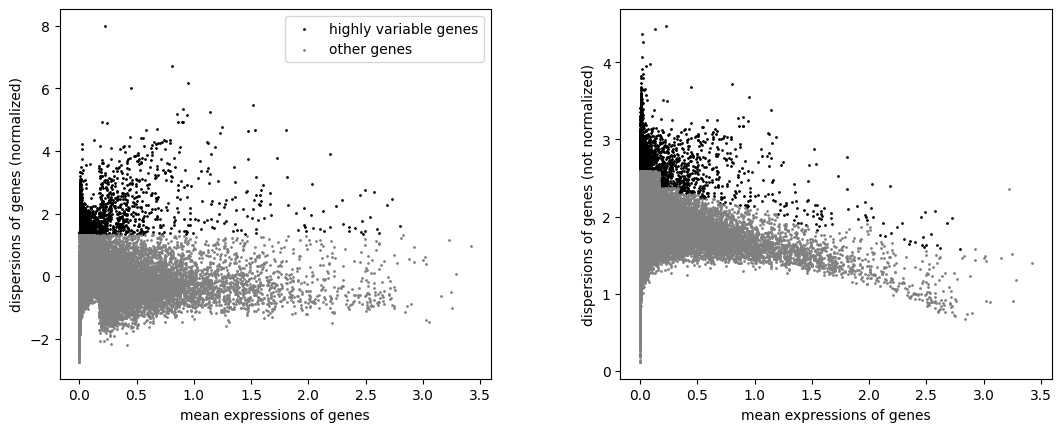

In [30]:
sc.pl.highly_variable_genes(sclcCells)

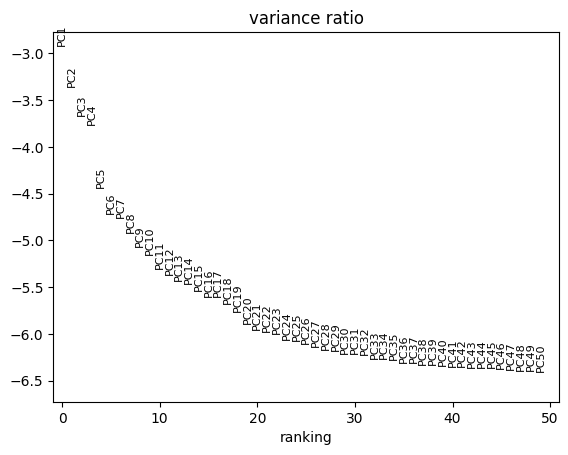

In [31]:
sclcCells = sclcCells[:, sclcCells.var.highly_variable]
sc.pp.regress_out(sclcCells, ['total_counts', 'pct_counts_mitochondrial', 'pct_counts_ribosomal'])
sc.pp.scale(sclcCells, max_value=10)
sc.tl.pca(sclcCells, svd_solver='arpack')
sc.pl.pca_variance_ratio(sclcCells, log=True, n_pcs = 50)

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


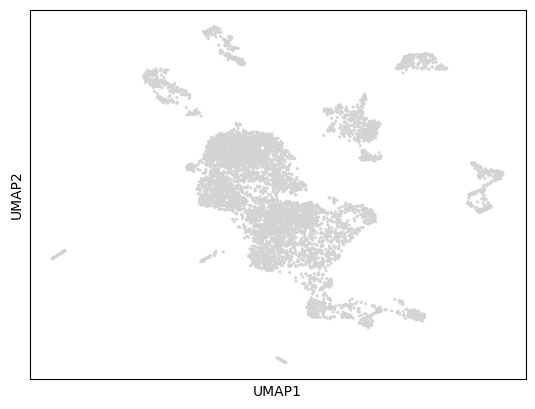

In [32]:
sc.pp.neighbors(sclcCells, n_pcs = 30)
sc.tl.umap(sclcCells)
sc.pl.umap(sclcCells)

In [33]:
sc.tl.leiden(sclcCells, resolution = 0.5)
sc.tl.paga(sclcCells, groups = 'leiden')

cluster_labels = sclcCells.obs['leiden']
cluster_labels

BT1248_GGACAGGATGACCA_lambrechts         5
scrBT1428_GGACGTCAGCTAACAA_lambrechts    4
scrBT1428_GTTCTCGCACACAGAG_lambrechts    7
BT1248_TAGCATCTGAACTC_lambrechts         6
scrBT1428_CCTCTGAAGACAAAGG_lambrechts    0
                                        ..
scrBT1428_CGATGTACACTCGACG_lambrechts    9
BT1242_GTACGTGACCATGA_lambrechts         8
scrBT1428_AGACGTTTCTATCGCC_lambrechts    0
scrBT1428_AACTCCCTCAGATAAG_lambrechts    4
BT1247_GCCTCAACAGATCC_lambrechts         4
Name: leiden, Length: 6114, dtype: category
Categories (17, object): ['0', '1', '2', '3', ..., '13', '14', '15', '16']

In [34]:
sclcCells.obs

,suspension_type,donor_id,is_primary_data,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,organism_ontology_term_id,...,development_stage,observation_joinid,doublet,n_genes_by_counts,total_counts_mitochondrial,pct_counts_mitochondrial,total_counts_ribosomal,pct_counts_ribosomal,n_genes,leiden
BT1248_GGACAGGATGACCA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000625,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,wxUib0^bFj,False,554,20.178600,1.521514,99.066490,7.469847,554,5
scrBT1428_GGACGTCAGCTAACAA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0002144,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,GhFu_CKEE-,False,338,20.098219,2.012080,74.763618,7.484763,338,4
scrBT1428_GTTCTCGCACACAGAG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000003,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,76<q}C0766,False,2285,34.341511,1.324262,189.404541,7.303731,2285,7
BT1248_TAGCATCTGAACTC_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000003,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,tONvO<J8zG,False,1283,20.302441,1.280168,116.973869,7.375772,1283,6
scrBT1428_CCTCTGAAGACAAAGG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000583,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,iT{#pmA`tb,False,1995,36.309513,1.716592,209.572998,9.907907,1995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrBT1428_CGATGTACACTCGACG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000861,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,y6fy!ewJ&(,False,1266,30.179634,1.476956,202.126862,9.891851,1266,9
BT1242_GTACGTGACCATGA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000003,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,)F?+?YKuw2,False,839,37.006516,2.203045,142.844955,8.503743,839,8
scrBT1428_AGACGTTTCTATCGCC_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000583,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,&|+z*D`I)J,False,2516,32.517727,1.432297,192.260544,8.468432,2516,0
scrBT1428_AACTCCCTCAGATAAG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0002144,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,7Bb>U?`BZg,False,313,14.471952,1.590312,74.470947,8.183555,313,4


/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


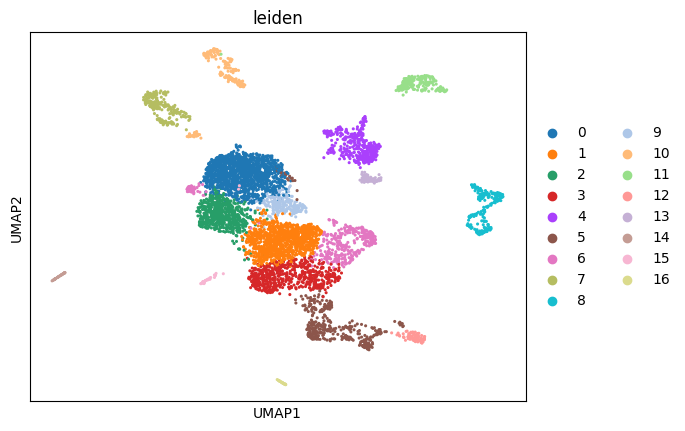

In [35]:
sc.pl.umap(sclcCells, color=['leiden'])

In [36]:
#sc.tl.leiden(sclcCells, resolution = 1)
sc.tl.rank_genes_groups(sclcCells, 'leiden')

In [37]:
markers = sc.get.rank_genes_groups_df(sclcCells, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,MCEMP1,74.779678,3.260475,0.000000,0.000000
1,0,CD52,63.830685,2.283523,0.000000,0.000000
2,0,MARCO,63.473034,2.331836,0.000000,0.000000
3,0,GCHFR,60.799496,2.418872,0.000000,0.000000
4,0,ALOX5AP,59.560070,2.533275,0.000000,0.000000
...,...,...,...,...,...,...
339161,16,DNAJB11,2.364131,1.620875,0.027288,0.049048
339162,16,IGLV1-40,2.363094,5.381992,0.027376,0.049173
339163,16,EIF1AY,2.359141,2.201022,0.027589,0.049533
339164,16,CCPG1,2.358354,1.696108,0.027629,0.049587


In [38]:
def ensemblIDfGene(adata,gene):
    '''
    ENSEMBL ID from gene
    '''
    obj = adata.var[adata.var.feature_name == gene]
    id = obj.index.tolist()[0]
    return id

def genefEnsemblID(adata,id):
    '''
    Gene from ENSEMBL ID
    '''
    obj = adata.var[adata.var.index == id]
    gene_name = obj.feature_name.tolist()[0]
    return gene_name


In [39]:
cellTypeDict = {
    '0':'alveolar macrophage',    
    '1':'lung macrophage',
    '2':'2', # native
    '3':'CD1c+ myeloid dentritic cell',
    '4':'capillary endothelial',
    '5':'T-cell', # CD4+, CD8+ T-cells
    '6':'vein endothelial cell',
    '7':'type 1 pneumocyte',
    '8':'native',
    '9':'elicited macrophage',
    '10':'fibroblast', # alveolar type 1 fibroblast, bronchous fibroblast, alveolar type 2 fibroblast
    '11':'type 2 pneumocyte',
    '12':'natural killer cell',
    '13':'NK Cells',
    '14':'14', # native
    '15':'mast cell',
    '16':'plasma cell',
}

sclcCells.obs['leiden_cell_type'] = sclcCells.obs['leiden'].map(cellTypeDict)


In [40]:
sclcCells.var_names = [genefEnsemblID(sclcCells, id) for id in sclcCells.var_names]
sclcCells.var_names

Index(['A2M', 'A2ML1', 'ABCA4', 'ABCA8', 'ABCA9', 'ABCB5', 'ABCC8', 'ABI3BP',
       'ACAP1', 'ACE',
       ...
       'ZNF80', 'ZNF83', 'ZNF831', 'ZNF843', 'ZSCAN18', 'COL4A1', 'ERG',
       'IL15RA', 'STC1', 'WFS1'],
      dtype='object', length=2000)

In [90]:
sclcCells.write_h5ad('sclcCellsGeneNames.h5ad')

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


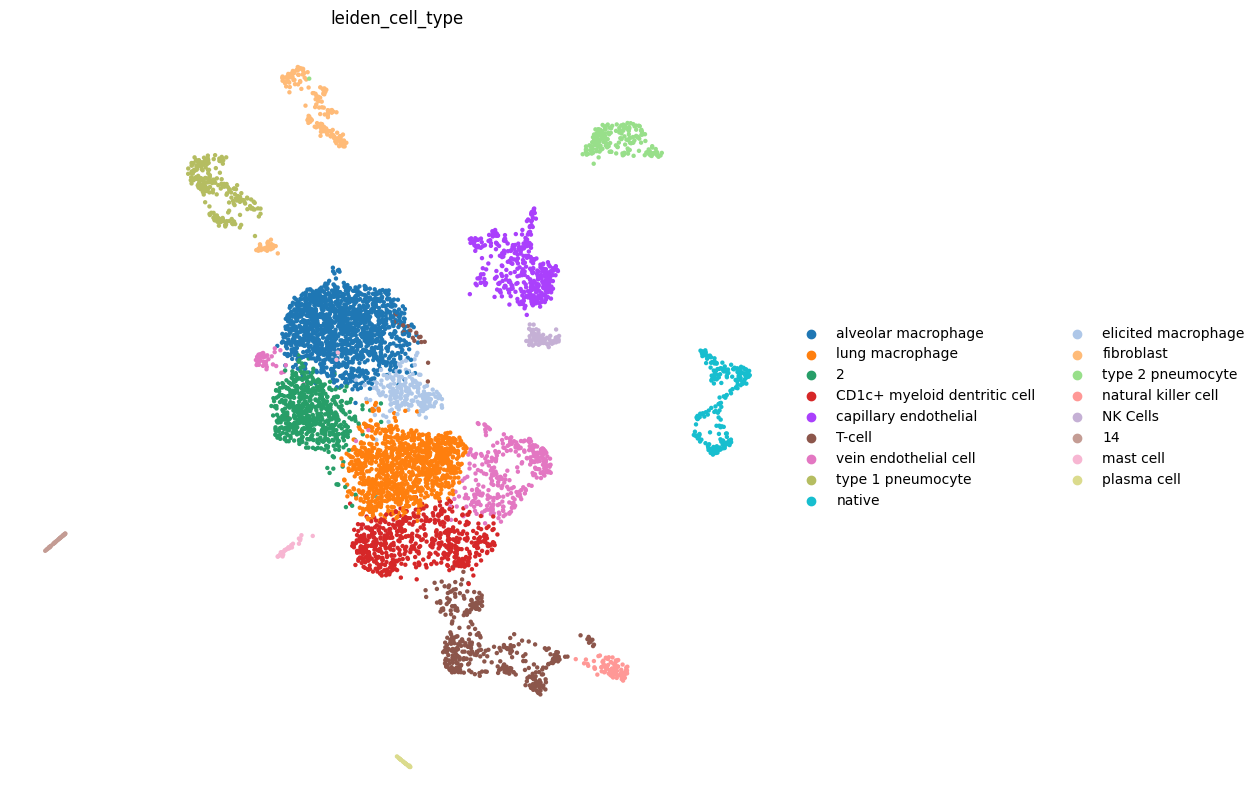

In [41]:
with plt.rc_context({"figure.figsize": (10, 10)}):
    sc.pl.umap(sclcCells, color = ['leiden_cell_type'], frameon = False, size=40)

# cellTypeDict = {
#     '0':'alveolar macrophage',    
#     '1':'lung macrophage',
#     '2':'', # native
#     '3':'CD1c+ myeloid dentritic cell',
#     '4':'capillary endothelial',
#     '5':'T-cell cluster', # CD4+, CD8+ T-cells
#     '6':'vein endothelial cell',
#     '7':'type 1 pneumocyte',
#     '8':'native',
#     '9':'elicited macrophage',
#     '10':'fibroblast', # alveolar type 1 fibroblast, bronchous fibroblast, alveolar type 2 fibroblast
#     '11':'type 2 pneumocyte',
#     '12':'natural killer cell',
#     '13':'NK Cells',
#     '14':'', # native
#     '15':'mast cell',
#     '16':'plasma cell',

# }

KeyError: 'ENSG00000174903'

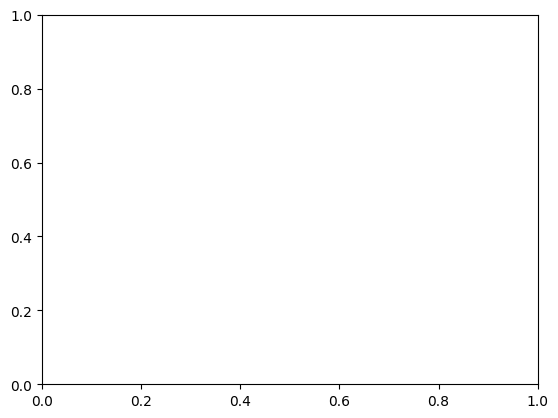

In [42]:
sc.pl.umap(sclcCells, color = ['ENSG00000174903'], frameon = False, vmax = 5)

In [81]:
ensemblIDfGene(sclcCells, 'ENSG00000187634')

IndexError: list index out of range

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


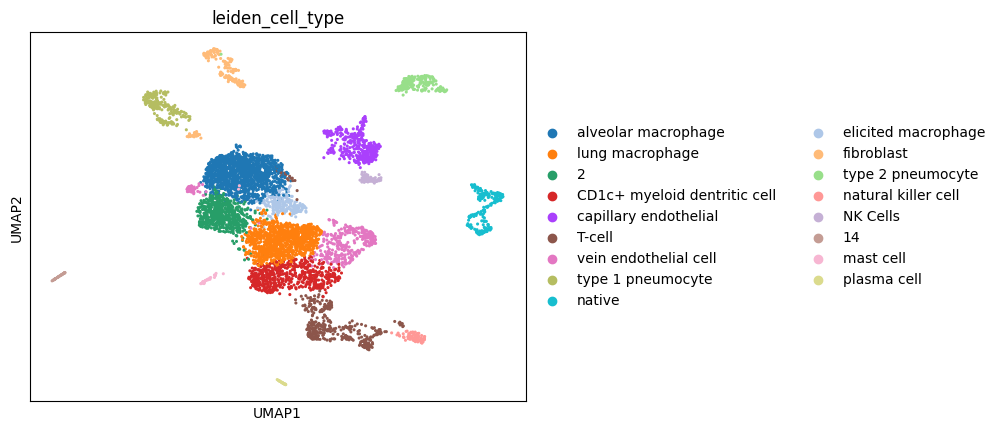

In [43]:
sc.tl.leiden(
    sclcCells,
    resolution=0.9,
    random_state=0,
    n_iterations=2,
    directed=False,
)

sc.pl.umap(sclcCells, color=["leiden_cell_type"])

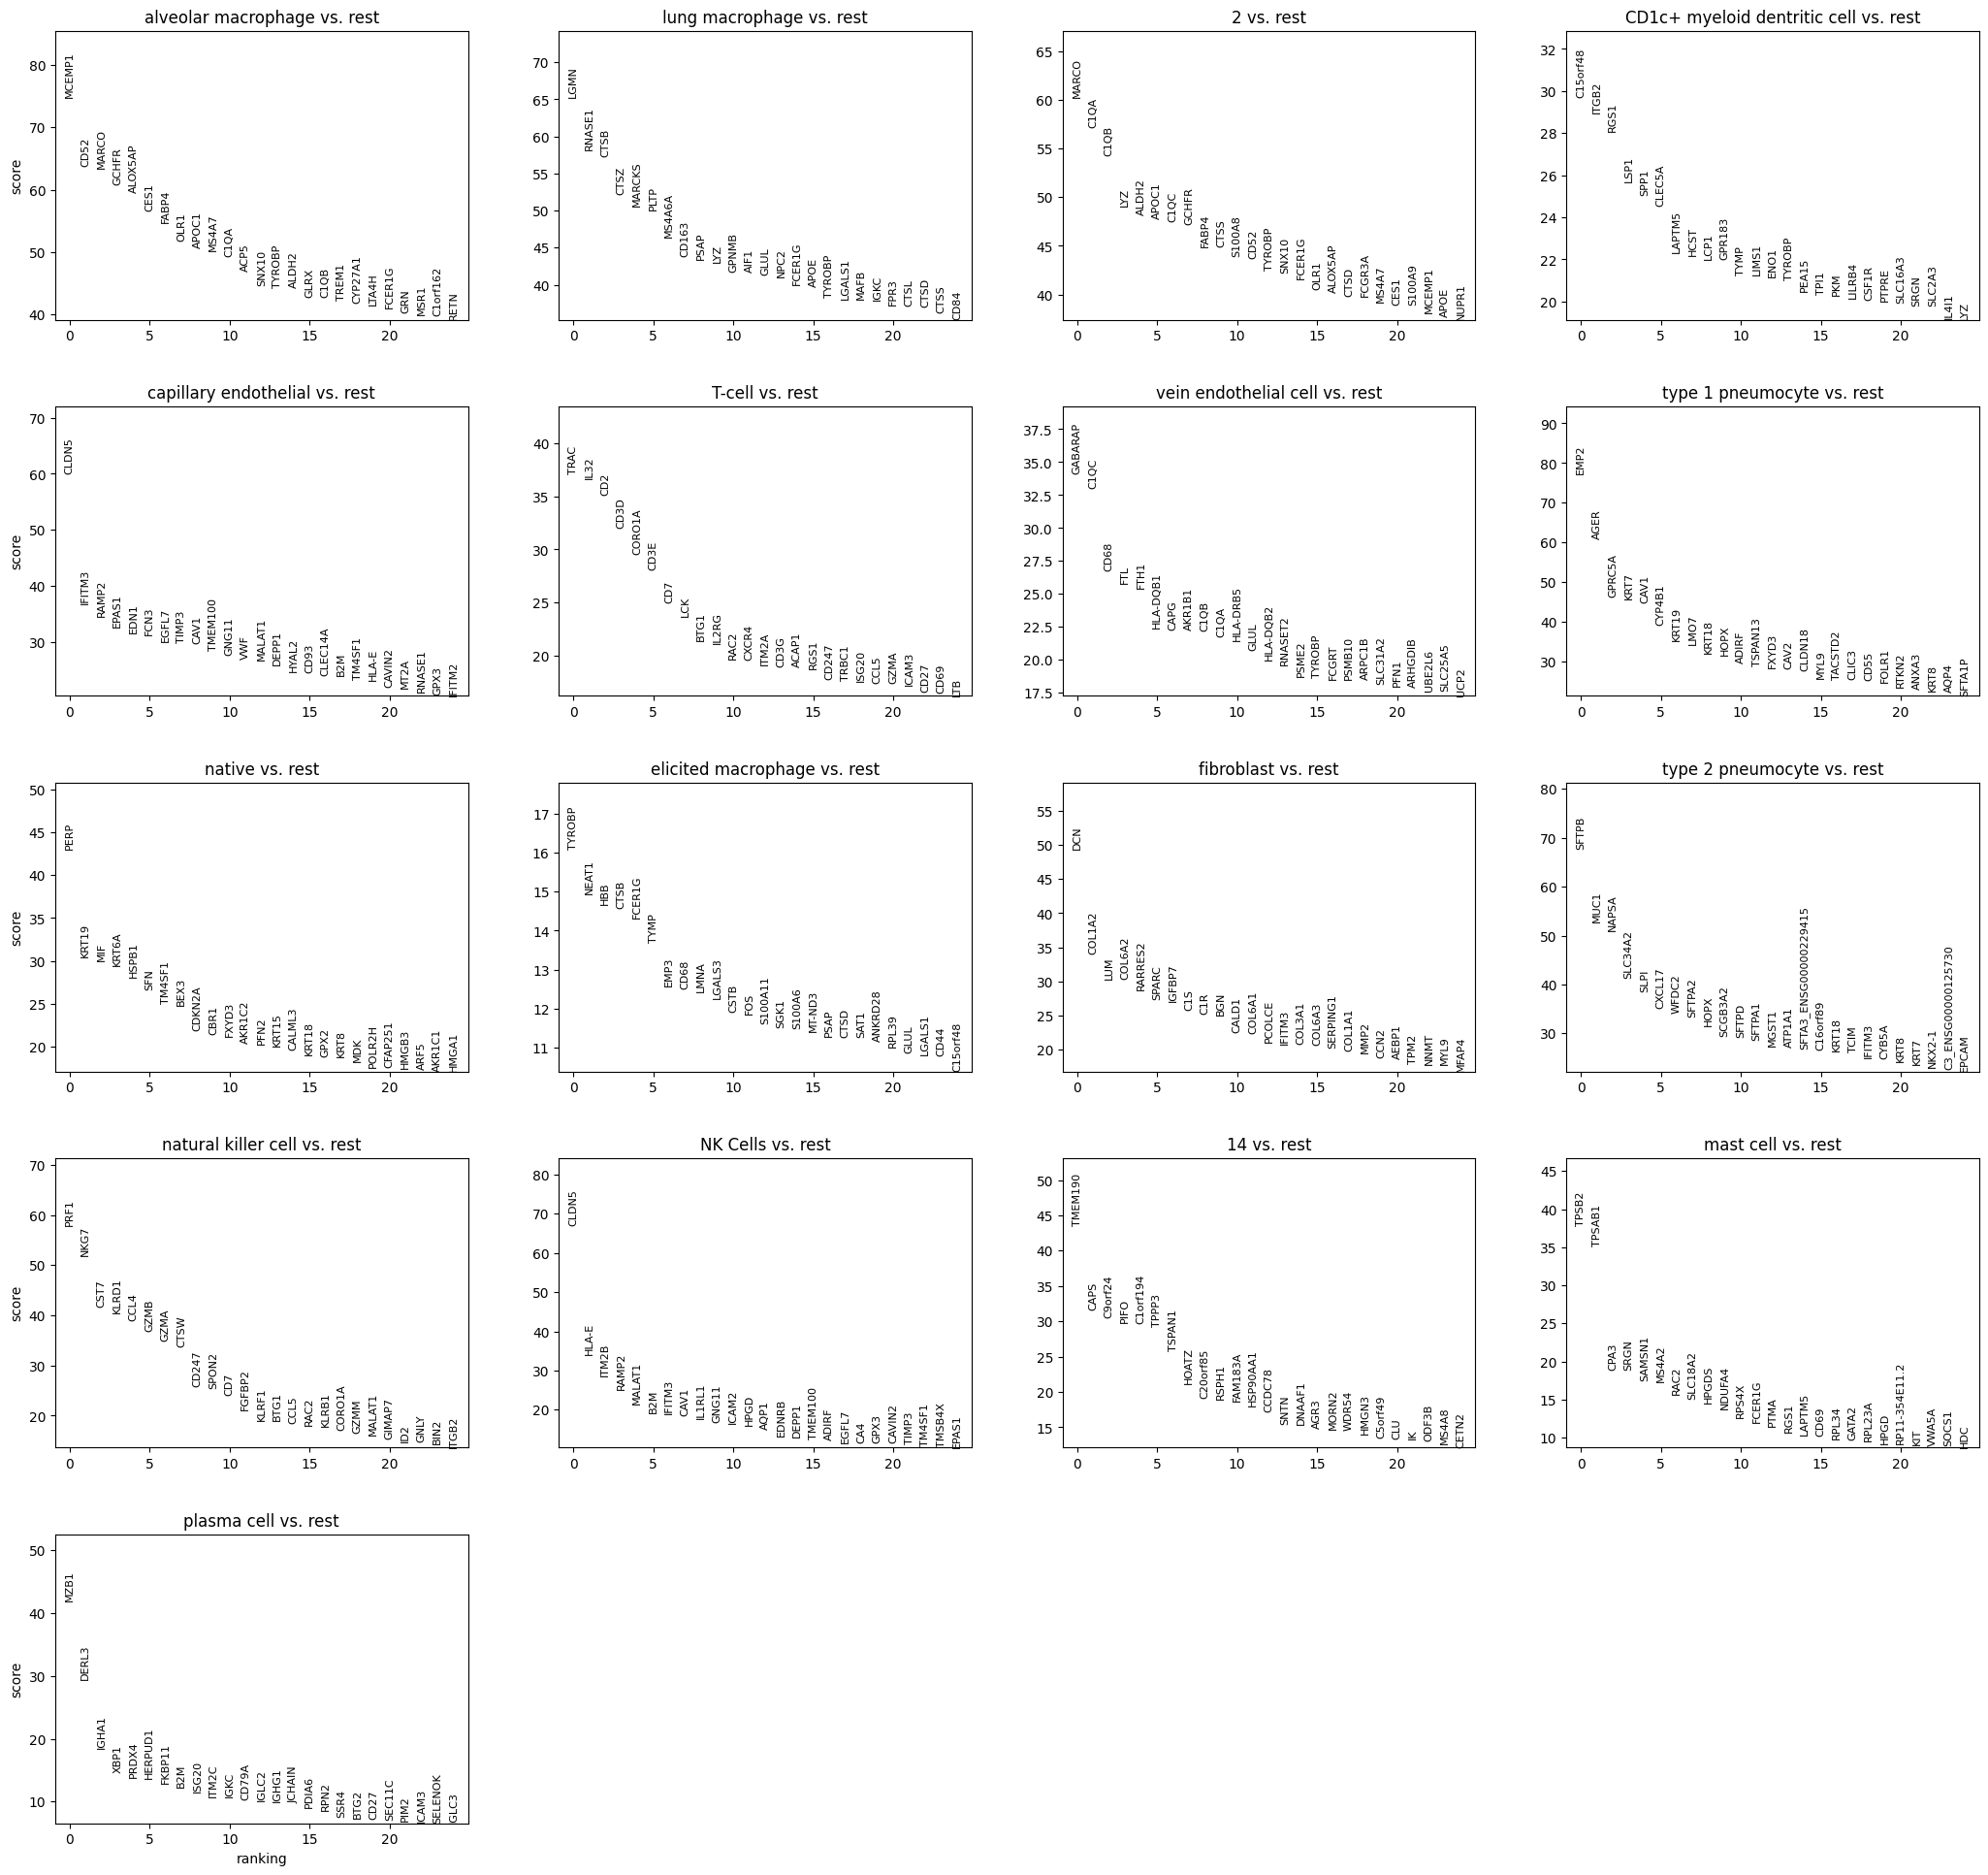

In [45]:
sc.tl.rank_genes_groups(sclcCells, "leiden_cell_type", method="t-test")
sc.pl.rank_genes_groups(sclcCells, n_genes=25, sharey=False)

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


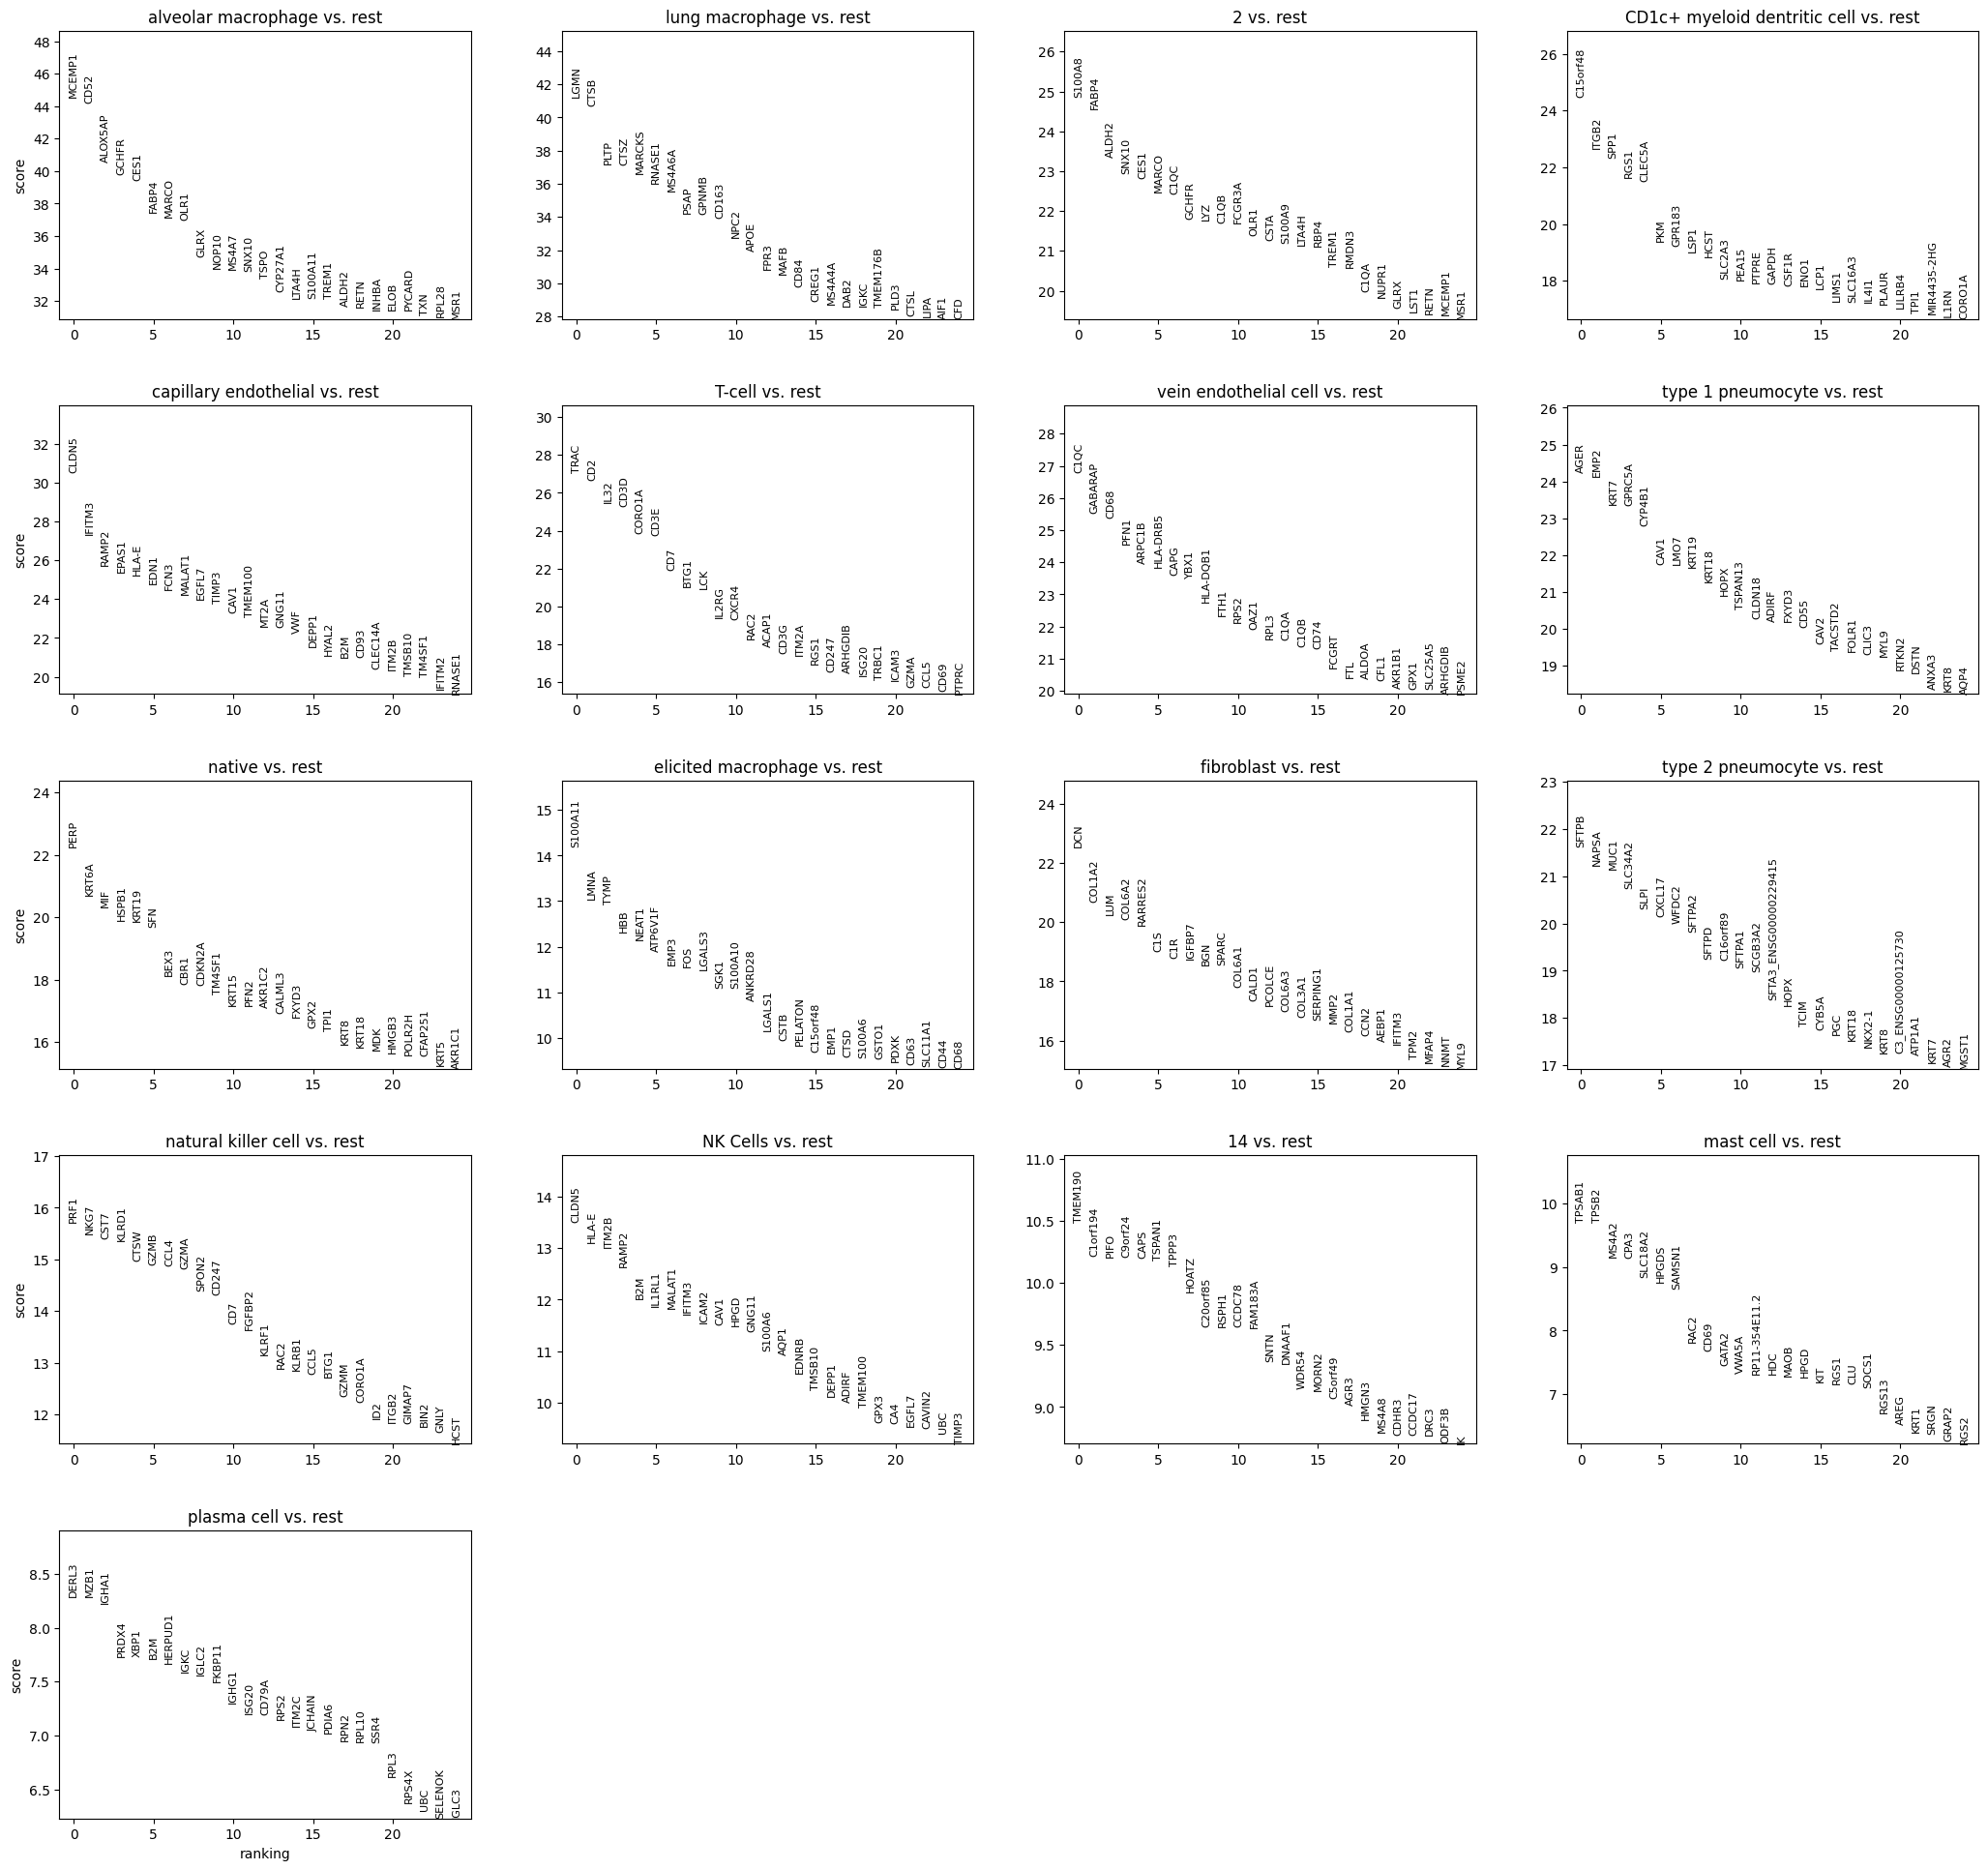

In [44]:
sc.tl.rank_genes_groups(sclcCells, "leiden_cell_type", method="wilcoxon")
sc.pl.rank_genes_groups(sclcCells, n_genes=25, sharey=False)

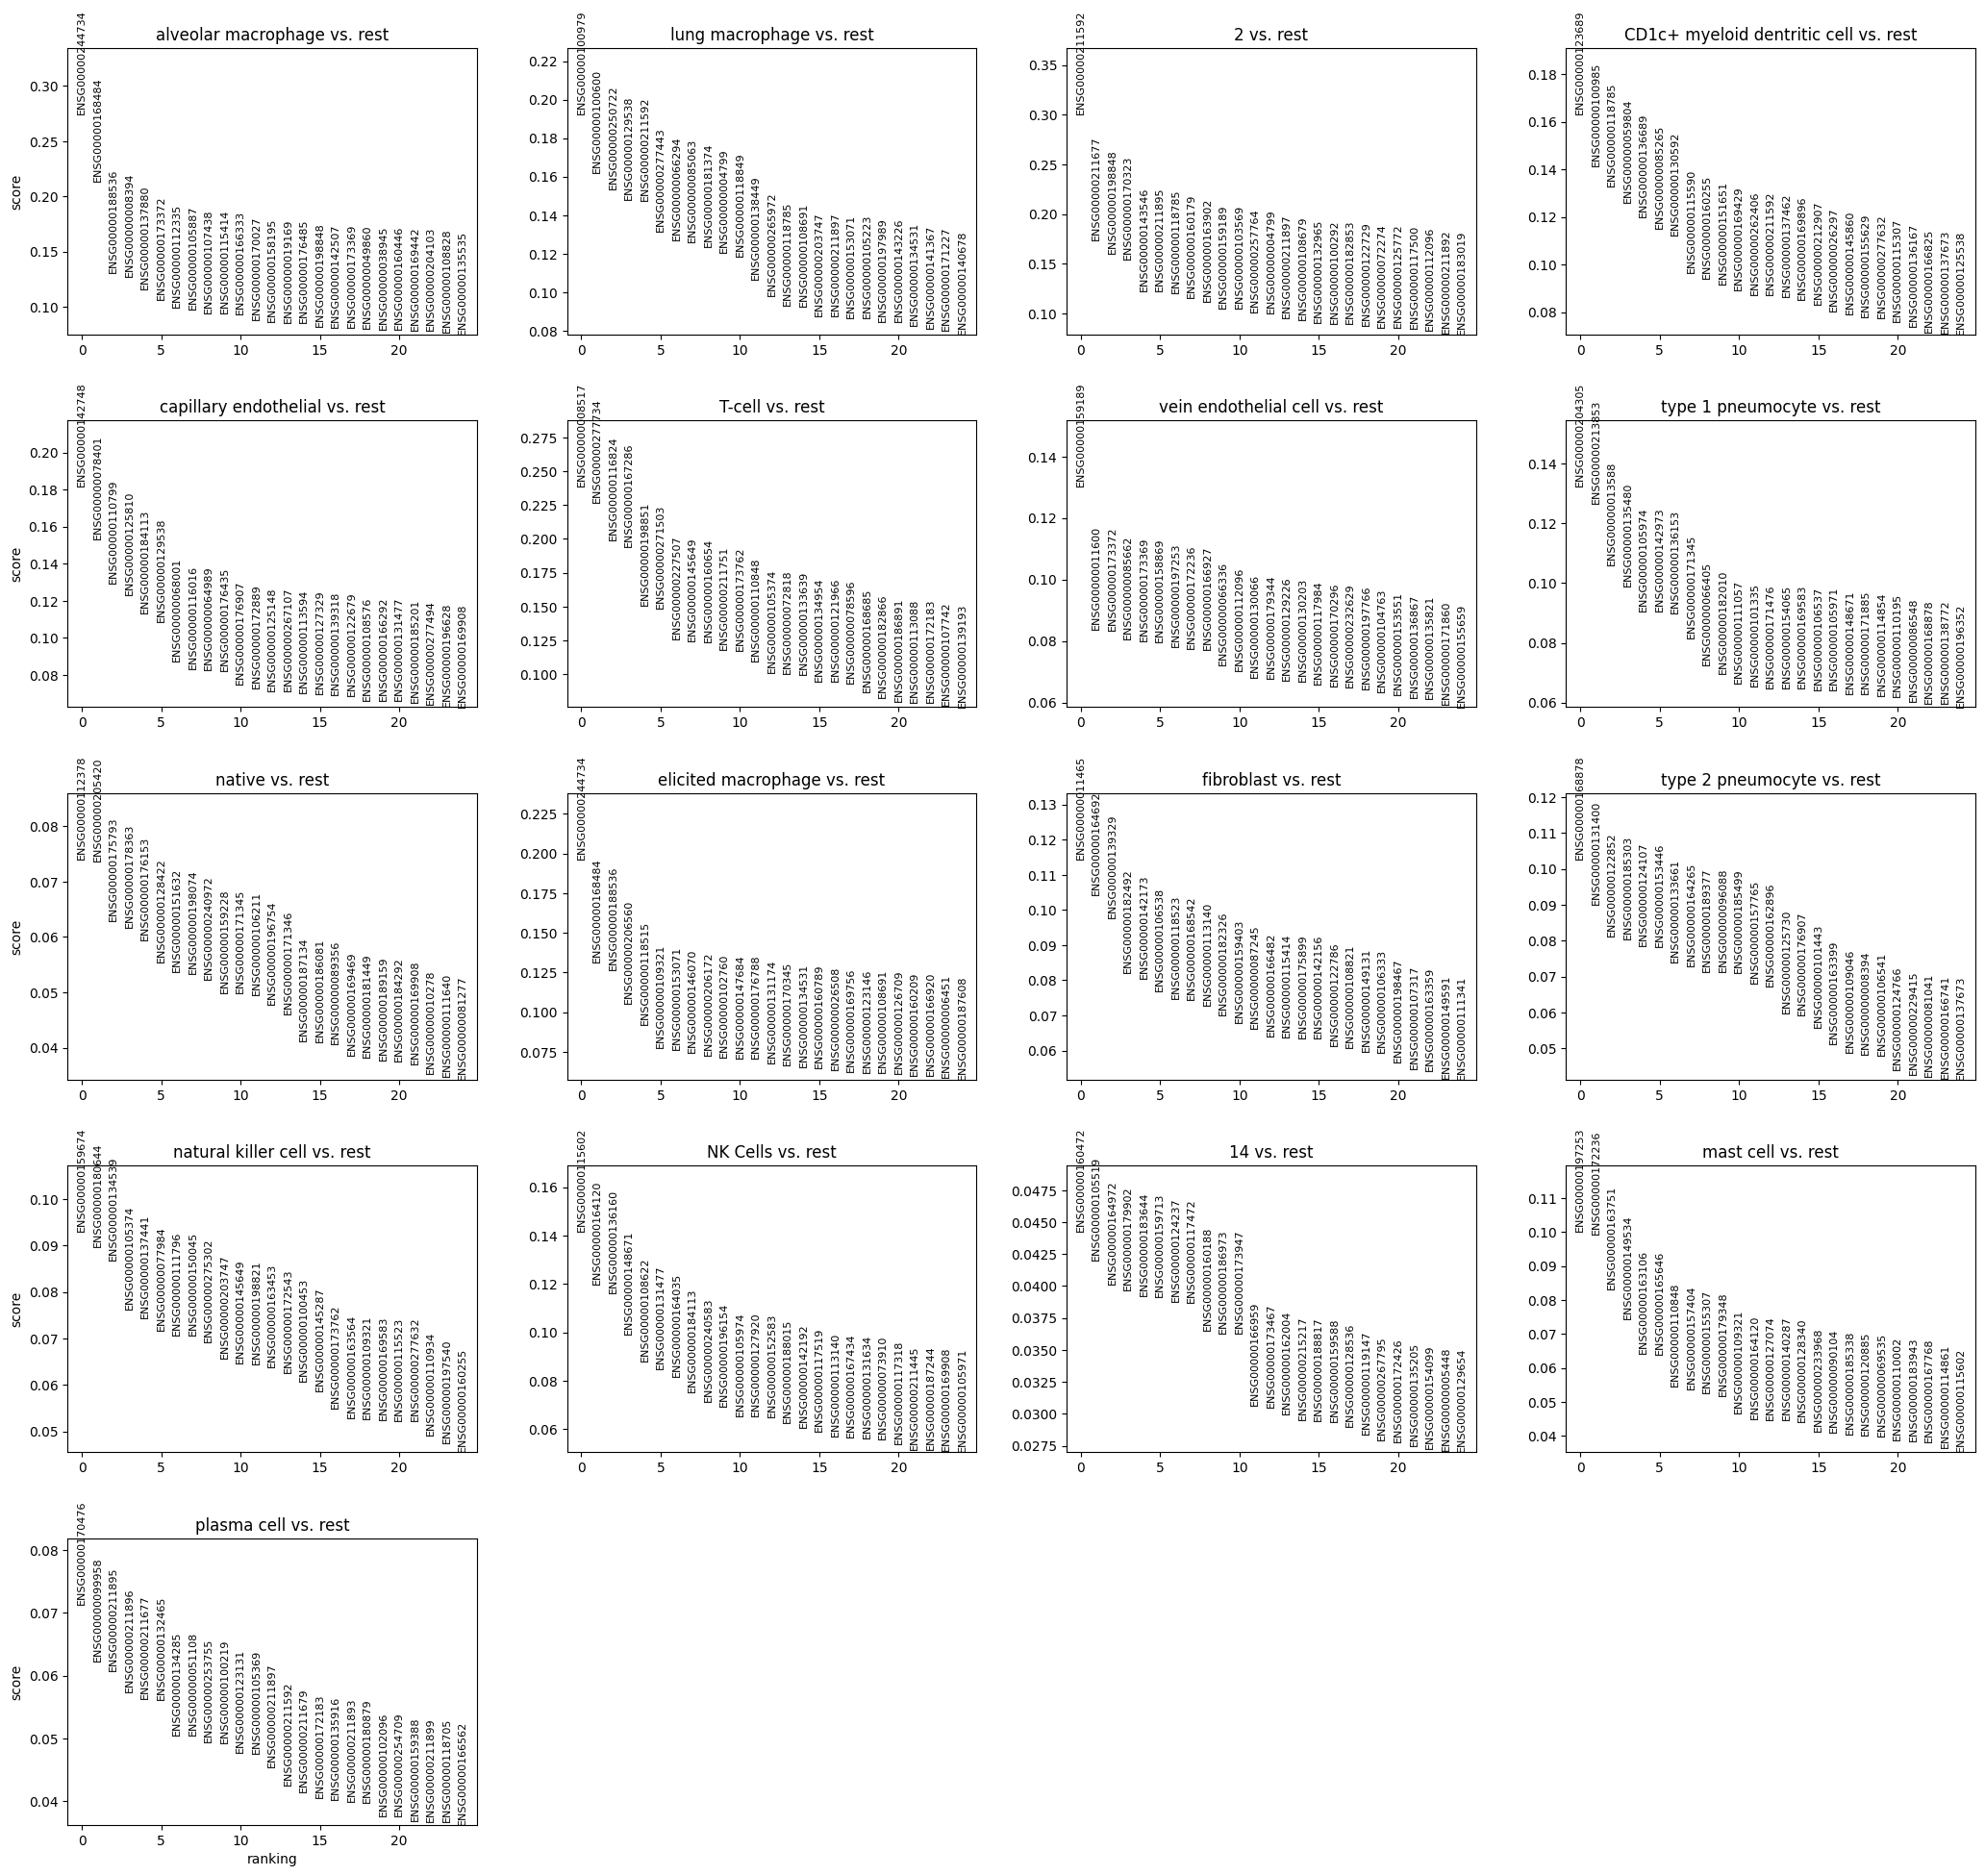

In [60]:
sc.tl.rank_genes_groups(sclcCells, "leiden_cell_type", method="logreg", max_iter=1000)
sc.pl.rank_genes_groups(sclcCells, n_genes=25, sharey=False)

In [47]:
sc.pl.rank_genes_groups_violin(sclcCells, groups="0", n_genes=25)

ValueError: no field of name 0

In [9]:
sc.tl.draw_graph(sclcCells)
# sc.pl.draw_graph(sclcCells, color=['leiden_cell_type'], legend_loc="on data")

KeyError: 'No "neighbors" in .uns'

In [62]:
sc.tl.leiden(sclcCells, resolution=1)

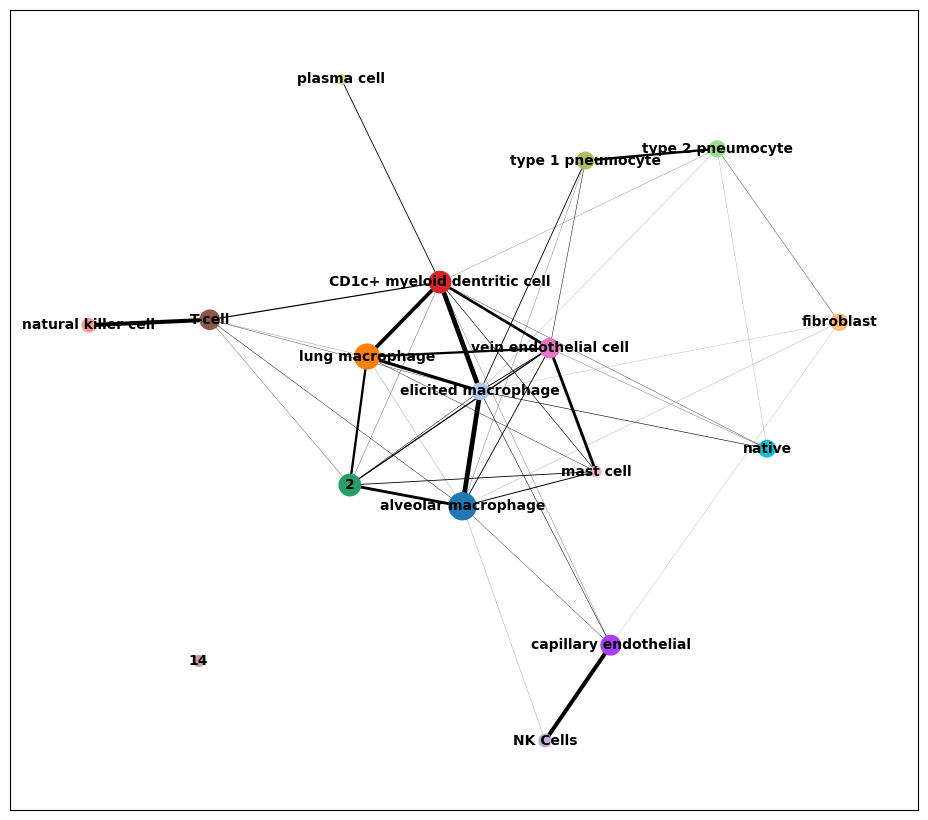

In [64]:
sc.tl.paga(sclcCells, groups="leiden_cell_type")
with plt.rc_context({"figure.figsize": (10, 10)}):
    sc.pl.paga(sclcCells, color='leiden_cell_type')


'MCEMP1'